<a href="https://colab.research.google.com/github/ameyas1/Pytorch-Notebooks/blob/main/Pytorch_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

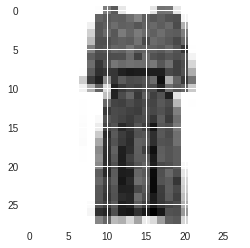

In [ ]:
features=image.view(64,784)

In [ ]:
w1=torch.randn((n_inputs,n_hidden))
w2=torch.randn((n_hidden,n_outputs))
b1=torch.randn((1,n_hidden))
b2=torch.randn((1,n_outputs))

In [ ]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [ ]:
def softmax(x):
  return torch.exp(x)/(torch.sum(torch.exp(x),dim=1)).view(-1,1)

In [ ]:
h1=activation(torch.mm(features,w1)+b1)

In [ ]:
h2=softmax(torch.mm(h1,w2)+b2)

In [ ]:
h2[0]

tensor([1.0954e-05, 1.8389e-09, 5.9680e-01, 1.5220e-17, 5.9255e-05, 1.6867e-06,
        8.6171e-08, 1.1306e-03, 2.0851e-13, 4.0200e-01])

**using module**

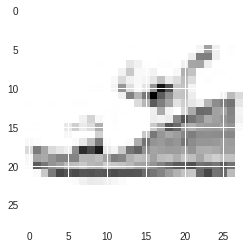

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = next(iter(trainloader))
plt.imshow(image[0,:].view(28,28));

In [ ]:
n_inputs=28*28
n_hidden1=256
n_hidden2=126
n_outputs=10

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(n_inputs,n_hidden)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(n_hidden,n_outputs)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [ ]:
from torch import nn
import torch.nn.functional as F
from torch import optim

In [ ]:
model = nn.Sequential(nn.Linear(n_inputs,n_hidden1),
                      nn.ReLU(),
                      nn.Linear(n_hidden1,n_hidden2),
                      nn.ReLU(),
                      nn.Linear(n_hidden2, n_outputs),
                      nn.LogSoftmax(dim=1))

In [ ]:
criterion=nn.NLLLoss()

In [ ]:
images,labels=next(iter(trainloader))

In [ ]:
images=images.view(images.shape[0],-1)

In [ ]:
ans=model(images)

In [ ]:
loss=criterion(ans,labels)

In [ ]:
print(loss)

tensor(2.3086, grad_fn=<NllLossBackward>)


In [ ]:
 model = nn.Sequential(nn.Linear(n_inputs,n_hidden1),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(n_hidden1,n_hidden2),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(n_hidden2, n_outputs),
                      nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

In [ ]:
train_losses,test_losses=[],[]

In [ ]:


for i in range(30):
  running_loss = 0
  for images,labels in trainloader:
    optimizer.zero_grad()
    images=images.view(images.shape[0],-1)
    output=model(images)
    loss=criterion(output,labels)
    running_loss+=loss.item()
    loss.backward()
    optimizer.step()
  else:
    test_loss=0
    accuracy=0
    model.eval()
    with torch.no_grad():
      for images,labels in testloader:
        img=images.view(images.shape[0],-1)
        output=model(img)
        test_loss+=criterion(output,labels)
        ps=torch.exp(output)
        top_p,top_class=ps.topk(1,dim=1)
        equals=top_class==labels.view(*top_class.shape)
        accuracy+=torch.mean(equals.type(torch.FloatTensor))
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
      
    model.train()  
    print(f"Epochs: {i+1}/30")
    print(f"Training Loss: {running_loss/len(trainloader)}")
    print(f"Testing Loss: {test_loss/len(testloader)}")
    print(f"Accuracy: {accuracy/len(testloader)}")
  
  
  

Epochs: 1/30
Training Loss: 0.30528999807865126
Testing Loss: 0.47447341680526733
Accuracy: 0.8541003465652466
Epochs: 2/30
Training Loss: 0.3062018310702813
Testing Loss: 0.45844143629074097
Accuracy: 0.8614649772644043
Epochs: 3/30
Training Loss: 0.3050274800405955
Testing Loss: 0.4716917872428894
Accuracy: 0.8597730994224548
Epochs: 4/30
Training Loss: 0.3119265180883377
Testing Loss: 0.5171304941177368
Accuracy: 0.8540008068084717
Epochs: 5/30
Training Loss: 0.29918347311807847
Testing Loss: 0.46326252818107605
Accuracy: 0.8572850227355957
Epochs: 6/30
Training Loss: 0.30405641932572636
Testing Loss: 0.5882652401924133
Accuracy: 0.8448447585105896
Epochs: 7/30
Training Loss: 0.3021236146802206
Testing Loss: 0.46867015957832336
Accuracy: 0.8578821420669556
Epochs: 8/30
Training Loss: 0.29860815063103047
Testing Loss: 0.46431493759155273
Accuracy: 0.8638535141944885
Epochs: 9/30
Training Loss: 0.30024040750126596
Testing Loss: 0.45933353900909424
Accuracy: 0.8572850227355957
Epochs: 

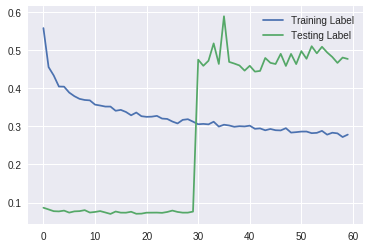

In [ ]:
plt.plot(train_losses,label='Training Label')
plt.plot(test_losses,label='Testing Label')
plt.legend(frameon=False)

In [ ]:
torch.save(model.state_dict(),'checkpoint.pth')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import helper
images,label=next(iter(trainloader))
img=images[0].view(1,784)


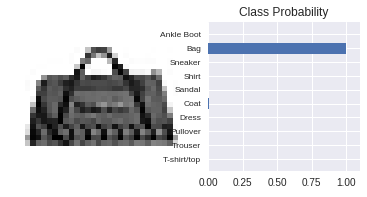

In [ ]:
with torch.no_grad():
  output=model.forward(img)
  
ps=torch.exp(output)
view_classify(img.view(1,28,28),ps,version='Fashion')

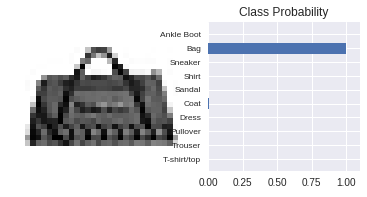

In [ ]:
output=model.forward(img)
  
ps=torch.exp(output)
view_classify(img.view(1,28,28),ps,version='Fashion')